In [0]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow import keras
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

In [0]:
test = pd.read_csv('/content/drive/My Drive/dataset/digit recognizer/test.csv')
train = pd.read_csv('/content/drive/My Drive/dataset/digit recognizer/train.csv')
digit_submission = pd.read_csv('/content/drive/My Drive/dataset/digit recognizer/sample_submission.csv')

In [0]:
train_label = train['label']
train_image = train.drop('label', axis=1)

In [0]:
train_image_array = train_image.values
train_image_array = train_image_array.astype(np.float)
test_array = test.values
test_array = test_array.astype(np.float)

In [0]:
train_image_array, test_array = train_image_array / 255.0, test_array / 255.0

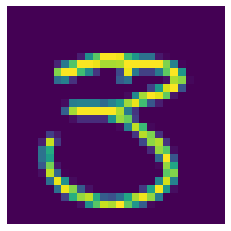

In [84]:
def display(img):
  #(784) => (28, 28)
  image = img.reshape(28, 28)

  plt.axis('off')
  plt.imshow(image)
  

display(train_image_array[7])

In [0]:
train_image_3d = []
for i in range(len(train_image_array)):
  one_img = train_image_array[i].reshape(28, 28)
  train_image_3d.append(one_img)

train_image_4d = np.array(train_image_3d)[:, :, :, np.newaxis]

In [0]:
test_3d = []
for i in range(len(test_array)):
  one_img = test_array[i].reshape(28, 28)
  test_3d.append(one_img)

test_4d = np.array(test_3d)[:, :, :, np.newaxis]

In [0]:
model = tf.keras.models.Sequential([
                                    Conv2D(64, 3, activation='relu'),
                                    MaxPooling2D(2, 2),
                                    Conv2D(32, 3, activation='relu'),
                                    MaxPooling2D(2, 2),
                                    Flatten(),
                                    Dense(128, activation='relu'),
                                    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [89]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
scores = []
for train_index, valid_index in cv.split(train_image_4d, train_label):
  model.fit(train_image_4d[train_index], train_label[train_index], epochs=10)
  score = model.evaluate(train_image_4d[valid_index], train_label[valid_index], verbose=2)
  scores.append(score)

Epoch 1/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.6856 - accuracy: 0.8166
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5577 - accuracy: 0.9226
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5406 - accuracy: 0.9337
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5319 - accuracy: 0.9402
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5260 - accuracy: 0.9449
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5217 - accuracy: 0.9480
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5185 - accuracy: 0.9510
Epoch 8/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5157 - accuracy: 0.9528
Epoch 9/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.5137 - accuracy: 0.9547
Epoch 10/10
1050/1050 [==============================] - 3s 3ms/step - loss: 1.511

In [114]:
print('Loss : {:.4f}, Accuracy : {:.4f}'.format(scores[4][0], scores[4][1]))

Loss : 1.4894, Accuracy : 0.9763


In [90]:
predictions = model.predict(test_4d)
predictions_list = [np.argmax(x) for x in predictions]
digit_submission['Label'] = predictions_list
digit_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
